# 勾配降下法

1. パラメータα, εが入力値として与えられる
2. 初期値$\boldsymbol{x_k}$を決める
3. kを0から1ずつ増やしながら以下を繰り返す  
(1). $||\nabla f(\boldsymbol{x_k})|| \leqq \epsilon$  
(2). $\boldsymbol{x_{k+1}}=\boldsymbol{x_k}-\alpha\nabla f(\boldsymbol{x_k})$

In [5]:
import numpy as np

In [6]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f_= f
        self.df_= df
        self.alpha_= alpha
        self.eps_= eps
        self.path_= None
        
    def solve(self, init):
        x = init
        path = []
        path.append(x)
        grad = self.df_(x)
        
        while (grad**2).sum() > self.eps_**2:
            grad = self.df_(x)
            x = x - self.alpha_ * grad
            path.append(x)
            
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f_(x)

In [7]:
import matplotlib.pyplot as plt

# 目的関数
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x ** 2 - 6 * x * y + 3 * y ** 2 + 6 * x - 6 * y

# 目的関数の微分
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

In [8]:
algo = GradientDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

[3.39930451e-07 1.00000047e+00]
-2.999999999999717


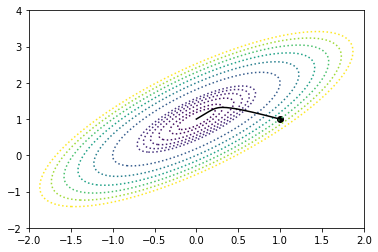

In [9]:
fig, ax = plt.subplots()
ax.scatter(initial[0], initial[1], color="k", marker="o")
ax.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)

xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 4, 400)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
ax.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, linestyles="dotted")

ax.set_ylim([-2, 4])
ax.set_xlim([-2, 2])
plt.show()

### 学習係数による勾配降下法の収束性

In [10]:
xmin, xmax, ymin, ymax = -2, 2, -2, 4

algos = []
initial = np.array([1, 1])
alphas = [0.01, 0.1, 0.2]

for alpha in alphas:
    algo = GradientDescent(f, df, alpha)
    algo.solve(initial)
    algos.append(algo)

/Users/inoueshinichi/opt/anaconda3/envs/PytorchPy36/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app
/Users/inoueshinichi/opt/anaconda3/envs/PytorchPy36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/Users/inoueshinichi/opt/anaconda3/envs/PytorchPy36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


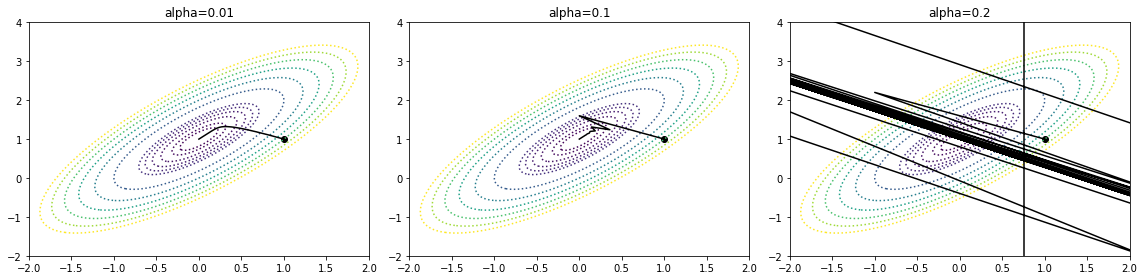

In [11]:
xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]

for i in range(3):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[:, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, linestyles="dotted")
    
plt.tight_layout()
plt.show()